In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.utils import plot_model
from IPython.display import display
from PIL import Image

Using TensorFlow backend.


In [2]:
##https://machinelearningmastery.com/keras-functional-api-deep-learning/
visible = Input(shape=(3,))
hidden1 = Dense(2, activation='sigmoid')(visible)
hidden2 = Dense(2, activation='sigmoid')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None


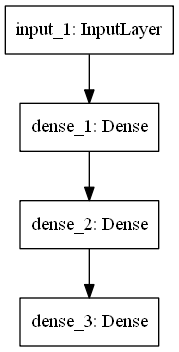

In [3]:
display(Image.open('multilayer_perceptron_graph.png'))

In [4]:
x = np.array([[200,15,8],[210,20,8],[220,25,8]])
y = np.array([[1], [0], [0]])

In [5]:
sgd = 'sgd' #optimizers.SGD(lr=0.1, clipnorm=1.) #'sgd' #
model.compile(loss='binary_crossentropy'            
            , optimizer=sgd
            , metrics=['accuracy']) 

In [6]:
history = model.fit(x, y 
                    , epochs=500 
                    , batch_size=10 # Number of observations per batch 
                    #, verbose=0 # No output 
                   )

Instructions for updating:
Use tf.cast instead.
Epoch 1/500


InternalError: Blas GEMM launch failed : a.shape=(3, 3), b.shape=(3, 2), m=3, n=2, k=3
	 [[{{node dense_1/MatMul}}]]
	 [[{{node loss/mul}}]]

In [ ]:
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
import matplotlib.pyplot as plt

#print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()


In [1]:
test = np.array([[0, 1, 2, 3, 4, 5, 6],[6, 5, 4, 3, 2, 1, 0],[1, 2, 3, 4, 5, 6, 7],[7, 6, 5, 4, 3, 2, 1]])
predictions = model.predict(test)
rounded = [x for x in predictions]

for i in range(len(rounded)):
    print('predict',rounded[i])
    print('%s => %d (expected %d)' % (x[i].tolist(), np.round(rounded[i]), y[i]))

NameError: name 'np' is not defined